Import necessary Dependencies

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [2]:
import warnings
warnings.filterwarnings('ignore')

Read and load the datasets

In [3]:
df=pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [4]:
df.shape

(299, 13)

In [5]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


Find the number of missing values per column

In [7]:
print(df.isnull().sum())

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


Insights: Their is no missing value in datasets

Check the Datatypes 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Insights: Their is no categorical columns and all the columns datasets  with correct datatypes

# Features:

Age: The age of the patient (numeric).

Anaemia: Indicates the presence of anemia (binary: 0 for no, 1 for yes).

Creatinine Phosphokinase (CPK): Level of creatinine phosphokinase enzyme in the blood (numeric).

Diabetes: Indicates whether the patient has diabetes (binary: 0 for no, 1 for yes).

Ejection Fraction: Percentage of blood leaving the heart at each contraction (numeric).

High Blood Pressure: Indicates whether the patient has high blood pressure (binary: 0 for no, 1 for yes).

Platelets: Platelet count in the blood (numeric).

Serum Creatinine: Level of creatinine in the blood (numeric).

Serum Sodium: Level of sodium in the blood (numeric).

Sex: Gender of the patient (binary: 0 for female, 1 for male).

Smoking: Indicates whether the patient smokes (binary: 0 for no, 1 for yes).

Time: Follow-up period (in days) for the patient's condition (numeric).



Q1.What is the distribution of age among heart failure patients in the dataset?

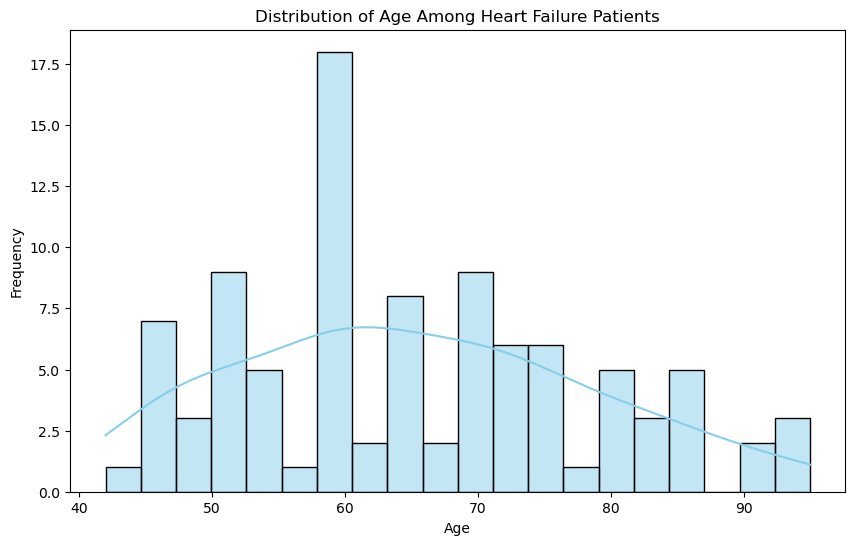

In [9]:
#Failure the datasets for heart failure patients
heart_failure_df= df[df['DEATH_EVENT']==1]

#plot the distribution of age among heart failure patients
plt.figure(figsize=(10,6))
sns.histplot(data= heart_failure_df, x='age', bins=20,kde= True, color='skyblue')
plt.title('Distribution of Age Among Heart Failure Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
    

Insights: the distribution of age among heart failure patients in the dataset is to Range 58 - 62 years

Q2.How does the death rate vary with age?

In [81]:
#Group data by age and count the number of deaths for each age group
age_group=df.groupby('age')['DEATH_EVENT'].sum()
age_group

age
40.000     0
41.000     0
42.000     1
43.000     0
44.000     0
45.000     6
46.000     1
47.000     0
48.000     2
49.000     1
50.000     8
51.000     1
52.000     0
53.000     1
54.000     1
55.000     3
56.000     0
57.000     1
58.000     2
59.000     3
60.000    13
60.667     1
61.000     0
62.000     1
63.000     0
64.000     0
65.000     8
66.000     0
67.000     0
68.000     2
69.000     2
70.000     7
72.000     5
73.000     1
75.000     6
77.000     1
78.000     0
79.000     0
80.000     5
81.000     0
82.000     3
85.000     3
86.000     1
87.000     1
90.000     2
94.000     1
95.000     2
Name: DEATH_EVENT, dtype: int64

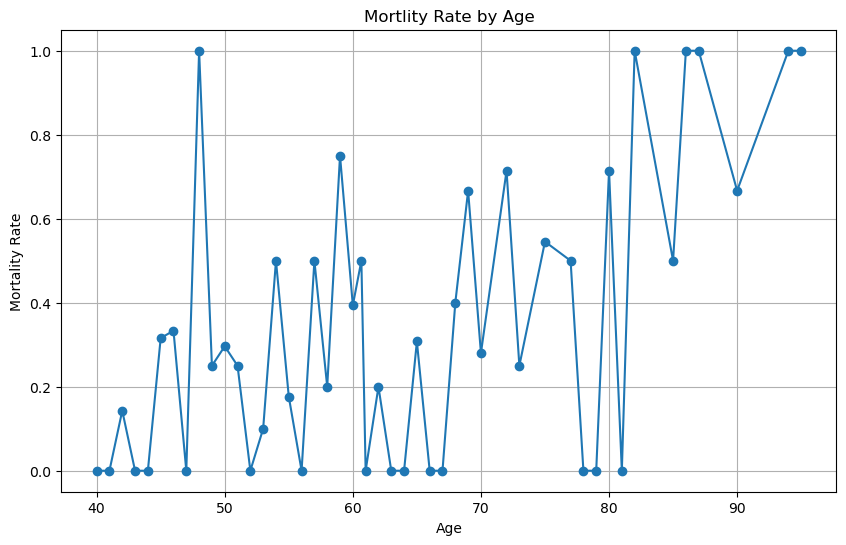

In [82]:
#Calculate mortality rate (deaths per total patients) for each age group
total_patients_by_age= df['age'].value_counts()
mortality_rate=age_group/ total_patients_by_age

#plot the mortaility rate against age
plt.figure(figsize=(10,6))
plt.plot(mortality_rate.index,mortality_rate.values, marker= 'o', linestyle='-')
plt.title('Mortlity Rate by Age')
plt.xlabel('Age')
plt.ylabel('Mortality Rate')
plt.grid(True)
plt.show()



<Axes: xlabel='age', ylabel='DEATH_EVENT'>

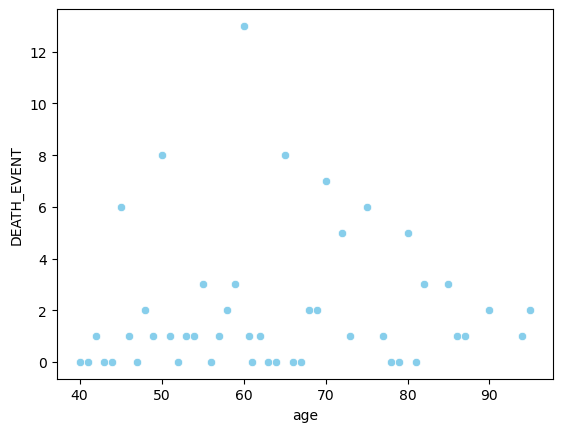

In [84]:
age_group=age_group.reset_index()
sns.scatterplot(x='age',y='DEATH_EVENT',data=age_group,marker= 'o',color='skyblue')

 Insights: This visualization will show how the mortality rate varies across different age groups, providing insights into the relationship between age anf the likelihood of death

Q3. What is the percentage of male and female patients in the dataset?

In [12]:
#Count the number of male and feamle patients
#binary: 0 for female, 1 for male
gender_counts= df['sex'].value_counts()
# calculate the patients of male and female patients
total_patients= gender_counts.sum()
male_percentage= (gender_counts[1]/total_patients)*100
female_percentage= (gender_counts[0]/total_patients)*100

#print the results
print(f"Total number of patients(0 for female and 1 for male):{gender_counts}")
print(f"Percentage of male patients :{female_percentage:.2f}%")
print(f"Percentage of female patients: {male_percentage:.2f}%")

Total number of patients(0 for female and 1 for male):sex
1    194
0    105
Name: count, dtype: int64
Percentage of male patients :35.12%
Percentage of female patients: 64.88%


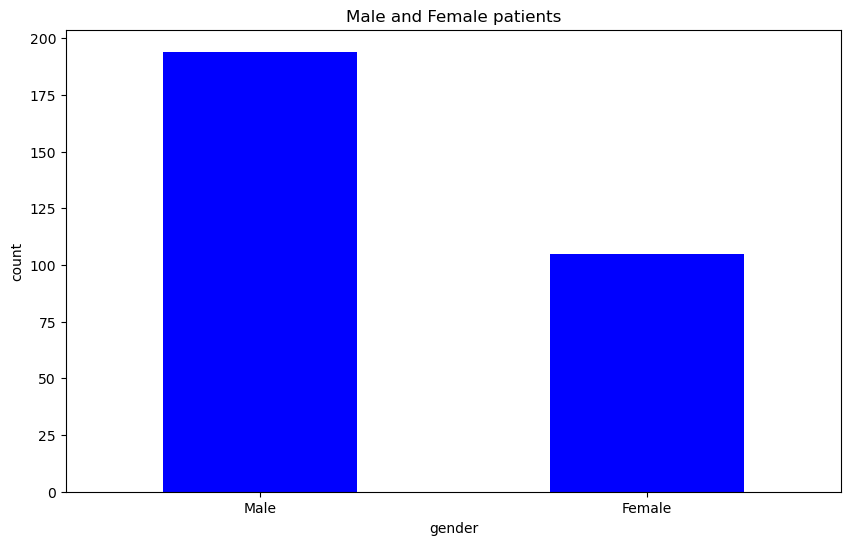

<Axes: ylabel='count'>

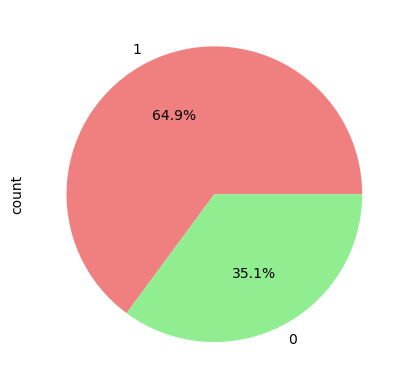

In [97]:
#Visulization the above data in bar and pie chart
plt.figure(figsize=(10,6))
gender_counts.plot(kind='bar', color='blue')
plt.title('Male and Female patients')
plt.xlabel('gender')
plt.ylabel('count')
plt.xticks(ticks=[0,1],rotation=0,labels=['Male','Female'])
plt.show()

df['sex'].value_counts().plot.pie(autopct='%1.1f%%',colors=['lightcoral','lightgreen'])


Q4.How does the platelet count vary among different age groups?

In [13]:
#find the min and max of age groups  in given datasets
print(df['age'].max())
print(df['age'].min())

95.0
40.0


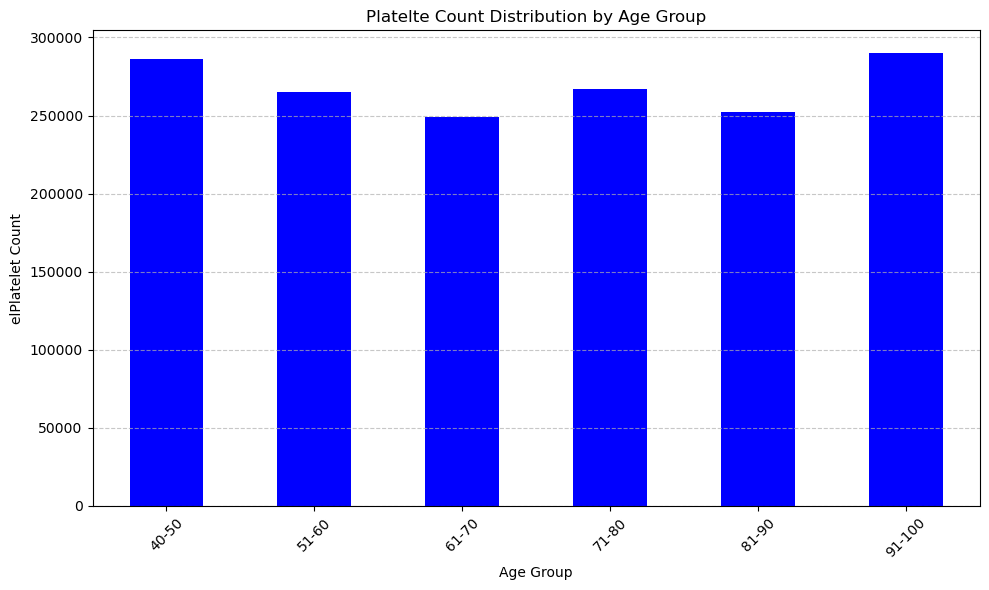

In [14]:
#Definr the age group
age_bins= [40,50,60,70,80,90,100]
age_labels= ['40-50','51-60','61-70','71-80','81-90','91-100']
#Add a new columns 'age_group' to the DataFrame based on gae bins
df['age_group']= pd.cut(df['age'],bins=age_bins,labels=age_labels, right= False)

#Group data by age group and calculate the mean platelate count for each group
platelet_by_age_group= df.groupby('age_group')['platelets'].mean()
#plot the platelet count distribution for each age group
plt.figure(figsize=(10,6))
platelet_by_age_group.plot( kind= 'bar',color= 'blue')
plt.title('Platelte Count Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('elPlatelet Count')
plt.xticks(rotation= 45)
plt.grid(axis='y',linestyle= '--', alpha= 0.7)
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=)

Q5. Is there a correlation between creatinine and sodium levels inthe bloods?

In [15]:
#Calculate the correlation coefficient between creatinine and sodium levels
correlation= df['serum_creatinine'].corr(df['serum_sodium'])
print("Correlation coefficient between creatinine and sodium levels:",correlation)

Correlation coefficient between creatinine and sodium levels: -0.1890952100911741


The correlation coefficient ranges from -1 to 1. A positive value indicates a positive correlation (as one variable increases, the other also tends to increase), while a negative value indicates a negative correlation (as one variable increases, the other tends to decrease). A value close to 0 indicates little to no correlation.

Q6. How does the prevalence of high blood pressure differ between male and female patients?

In [99]:
#Group data by gender and calculate the percentage of patients with high blood pressure
#(0 for female and 1 for male)
high_bp_counts= df.groupby('sex')['high_blood_pressure'].value_counts(normalize= True)*100

 #Access the percentage of patients with high blood pressure for each gender
male_high_bp_percentage= high_bp_counts[1, 1] if( 1, 1) in high_bp_counts.index else 0
female_high_bp_percentage= high_bp_counts[0,1] if (0,1) in high_bp_counts.index else 0

#print the result
print(f"Percentage of male patients with high blood pressure :{male_high_bp_percentage:.2f}%")
print(f"Percentage of female patients with high blood pressure:{female_high_bp_percentage:.2f}%")


Percentage of male patients with high blood pressure :31.44%
Percentage of female patients with high blood pressure:41.90%


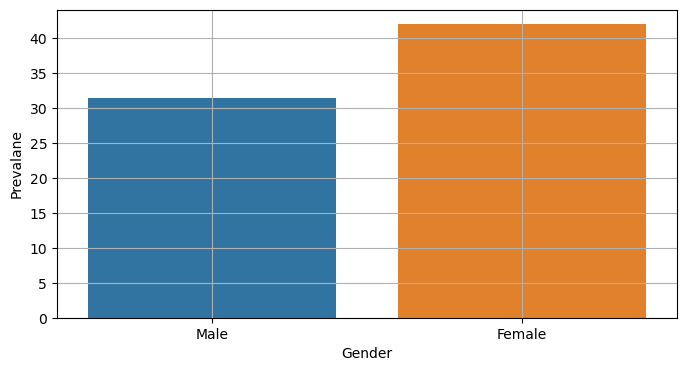

In [107]:
plt.figure(figsize=(8,4))
sns.barplot(x=['Male','Female'],y=[male_high_bp_percentage,female_high_bp_percentage])
plt.title=('Prevalance of High Blood Pressure by Gender')
plt.xlabel('Gender')
plt.ylabel('Prevalane')
plt.grid(True)
plt.show()

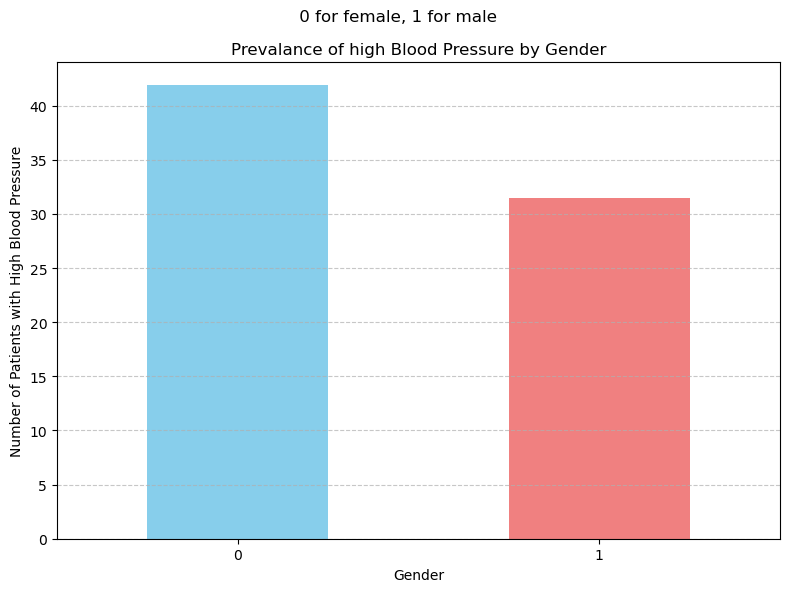

In [17]:
#Group date by gender and calculate the percentage of patients with high blood pressure
#(0 for female and 1 for male)
prevalence_by_gender= df.groupby('sex')['high_blood_pressure'].mean()*100

#plot the prevalance of high blood pressure by gender
plt.figure(figsize= (8,6))
prevalence_by_gender.plot(kind='bar',color=['skyblue','lightcoral'])
plt.title('Prevalance of high Blood Pressure by Gender')
plt.suptitle(' 0 for female, 1 for male')
plt.xlabel('Gender')
plt.ylabel('Number of Patients with High Blood Pressure')
plt.xticks(rotation=0)
plt.grid(axis='y',linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Q7. What is the relationship between smoking habits and the occurrence of heart failure?

In [18]:
print( "0 for no, 1 for yes")
print(df['smoking'].value_counts())
print(df['DEATH_EVENT'].value_counts())

0 for no, 1 for yes
smoking
0    203
1     96
Name: count, dtype: int64
DEATH_EVENT
0    203
1     96
Name: count, dtype: int64


In [19]:
prevalence_by_smoking =df.groupby('smoking')['DEATH_EVENT'].value_counts()
prevalence_by_smoking

smoking  DEATH_EVENT
0        0              137
         1               66
1        0               66
         1               30
Name: count, dtype: int64

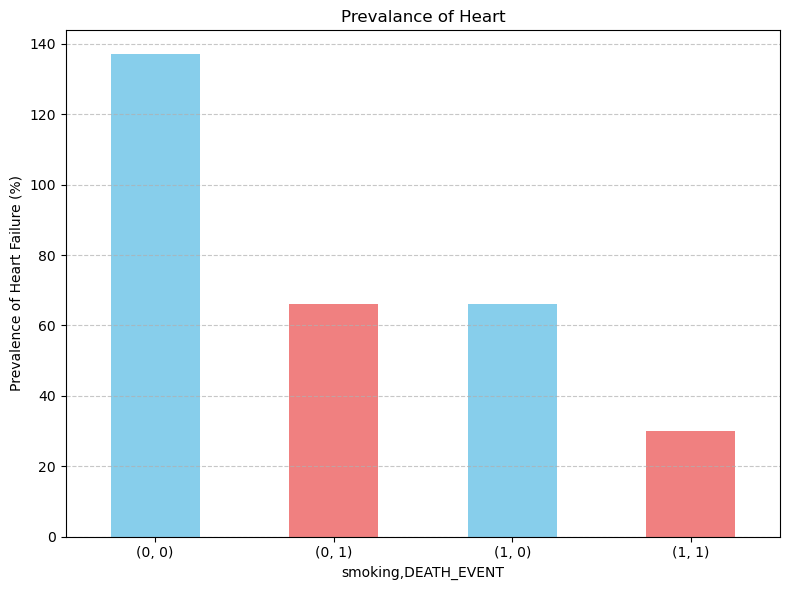

In [20]:
#Group data by smoking status and calculate the prevalance of heart failure
prevalence_by_smoking =df.groupby('smoking')['DEATH_EVENT'].value_counts()
#plot the prevalence of heart failure by smoking status
plt.figure(figsize= (8,6))
prevalence_by_smoking.plot(kind='bar',color=['skyblue','lightcoral'])
plt.title('Prevalance of Heart')
plt.ylabel('Prevalence of Heart Failure (%)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [21]:
prevalence_by_smoking =df.groupby('smoking')['DEATH_EVENT'].mean()*100
prevalence_by_smoking

smoking
0    32.512315
1    31.250000
Name: DEATH_EVENT, dtype: float64

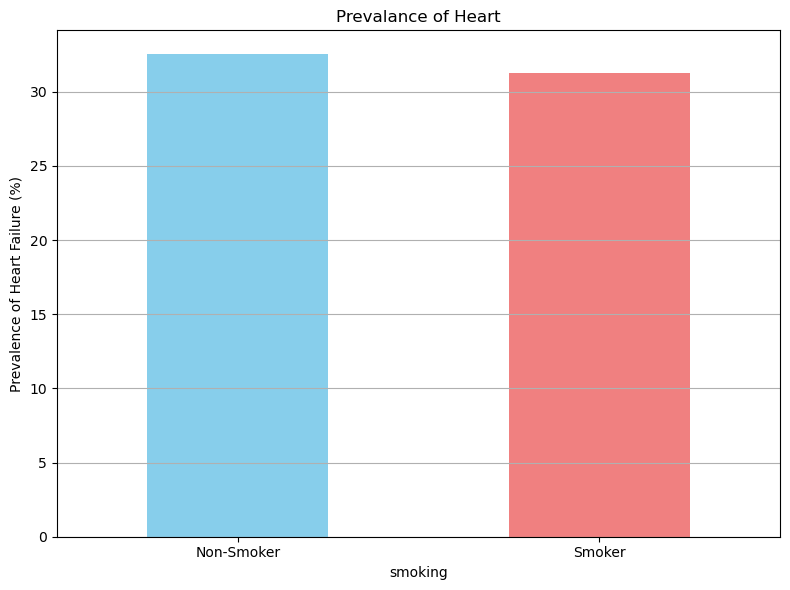

In [75]:
#Group data by smoking status and calculate the prevalance of heart failure
prevalence_by_smoking =df.groupby('smoking')['DEATH_EVENT'].mean()*100

#plot the prevalence of heart failure by smoking status
plt.figure(figsize= (8,6))
prevalence_by_smoking.plot(kind='bar',color=['skyblue','lightcoral'])
plt.title('Prevalance of Heart')
plt.ylabel('Prevalence of Heart Failure (%)')
plt.xticks(ticks=[0,1],rotation=0,labels=['Non-Smoker','Smoker'])
#plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

Q8.Are there any noticeable patterns in the distribution of death events across different age groups?

In [26]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


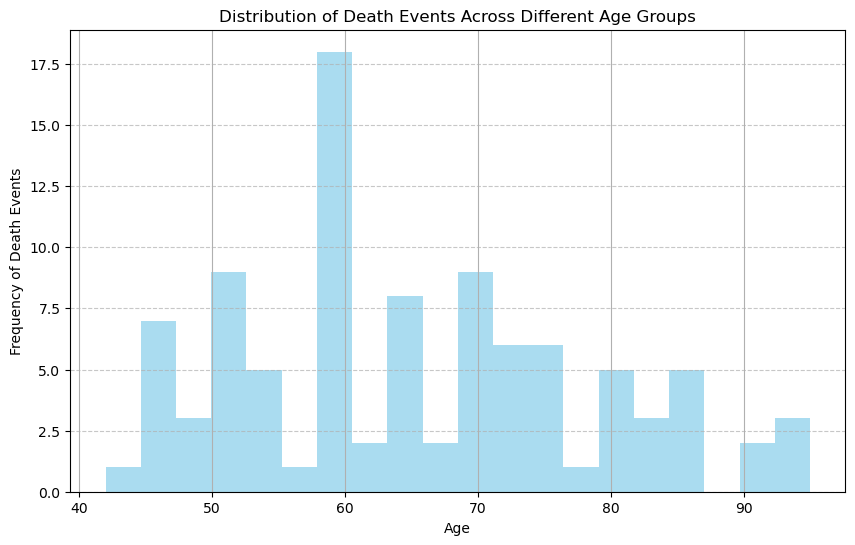

In [29]:
# Create a histogram of death events across different age groups
plt.figure(figsize=(10, 6))
df[df['DEATH_EVENT'] == 1]['age'].hist(bins=20, color='skyblue', alpha=0.7)
plt.title('Distribution of Death Events Across Different Age Groups')
plt.xlabel('Age')
plt.ylabel('Frequency of Death Events')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Insights: In the age of range between 58.5 to 60.5  has hight death occurs 

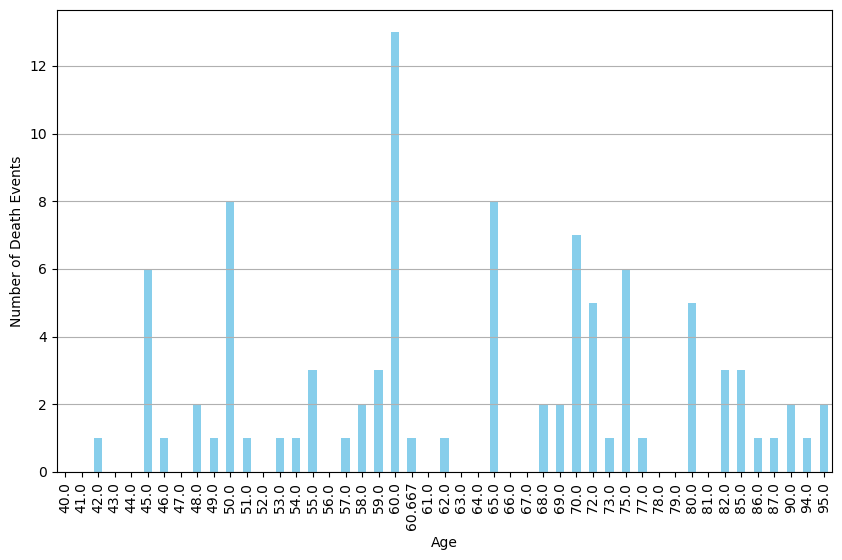

In [62]:
death_events_by_age= df.groupby('age')['DEATH_EVENT'].sum()
#plot the distribution of death events across different age groups
plt.figure(figsize=(10,6))
death_events_by_age.plot(kind='bar', color='skyblue')
plt.xlabel('Age')
plt.ylabel('Number of Death Events')
plt.xticks(rotation=90)
plt.grid(axis= 'y')
plt.show()

In [ ]:
Insights : Death events the age of 60 has higher compare to other age group

Q9.Is there any significant difference in ejection fraction between patients with and without diabetes?

In [46]:
#split the dataset into two groups: patients with and without diabetes
ejection_fraction_diabetes= df[df['diabetes']==1]['ejection_fraction']
ejection_fraction_no_diabetes= df[df['diabetes']==0]['ejection_fraction']


mean_of_diabetes= ejection_fraction_diabetes.mean()
mean_of_no_diabetes= ejection_fraction_no_diabetes.mean()
#perform an independent t-test
t_statistic,p_value= ttest_ind(ejection_fraction_diabetes, ejection_fraction_no_diabetes)

#set the significaton level
alpha= 0.05
#print the results
print("Mean ejection fraction for patients with diabetes:",mean_of_diabetes)
print("Mean ejection fraction for patients without diabetes:",mean_of_no_diabetes)
_
print("Independent T-Test Results:")
print("t-statistics:", t_statistic)
print("p-value:",p_value)

#Interpret the results
if p_value <alpha:
    print("There is a significant difference in ejection fraction between patients with and without diabetes.")
else:
    print("There is no significant difference in ejection fracton between patients with and without diabetes.")
        

Mean ejection fraction for patients with diabetes: 38.016
Mean ejection fraction for patients without diabetes: 38.132183908045974
Independent T-Test Results:
t-statistics: -0.08358970647234736
p-value: 0.9334389630426103
There is no significant difference in ejection fracton between patients with and without diabetes.


Q10. How does the serum creatinine level vary between patients who survived and those who did not?

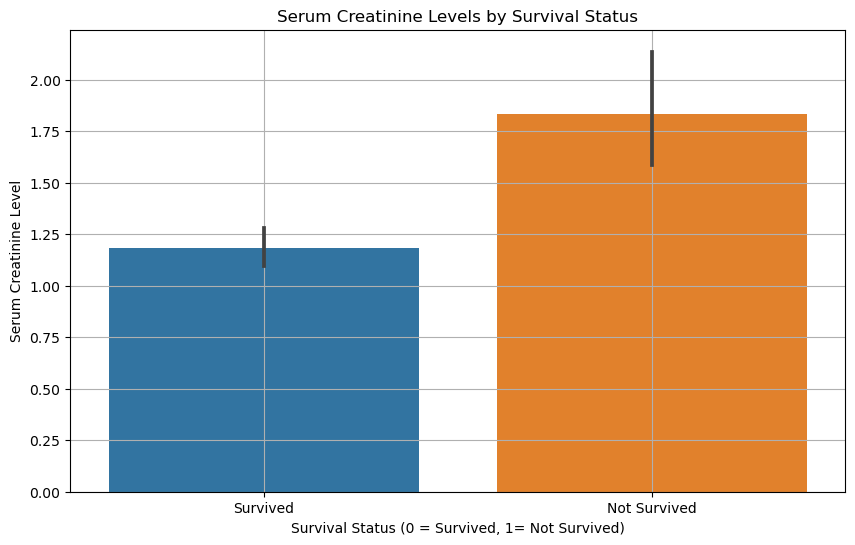

Mean Serum Creatinine Level (Survived):1.18%
Mean Serum Creatinine Level( Not Survived):1.84%


In [57]:
creatinine_survived= df[df['DEATH_EVENT']==0]['serum_creatinine']
creatinine_not_survived =df[df['DEATH_EVENT']==1]['serum_creatinine']

#Compare serum creatinine levels:
mean_creatinine_survived= creatinine_survived.mean()
mean_creatinine_not_survived = creatinine_not_survived.mean()

#visualization the distribution of serum creatinine levels for each group
plt.figure(figsize=(10,6))
sns.barplot(x='DEATH_EVENT',y='serum_creatinine',data=df)
plt.title('Serum Creatinine Levels by Survival Status')
plt.xlabel('Survival Status (0 = Survived, 1= Not Survived)')
plt.ylabel('Serum Creatinine Level')
plt.xticks(ticks=[0,1],labels=['Survived','Not Survived'])
plt.grid(True)
plt.show()

#print mean serum creatinine Levels for each group
print(f"Mean Serum Creatinine Level (Survived):{mean_creatinine_survived:.2f}%")
print(f"Mean Serum Creatinine Level( Not Survived):{mean_creatinine_not_survived:.2f}%")